# Image preprocessing with Invertion and CLAHE
Out team tried to use image upscaling, however it also provided smoothing, which can lead to distortion of erosion features on image, so this idea was not used further.
We used CLAHE (Contrast Limited Adaptive Histogram Equalization) to enhance the contrast of all x-ray images. This helped a lot with images, partly or fully lighted.

Also while exploring the dataset, I noticed that some images have dark background and light bones and other on the contrary have light background and dark bones.
So inverting images is necessary. To perform the invertion I converted images to tensor and used  ' v2.functional.invert(img_tensor) ' if tensor.mean was greater than 0.4.

In [ ]:
import torch
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from tqdm import tqdm
from torchvision.transforms import v2

In [ ]:
def clahe(pil_image):
    '''
    Perform CLAHE on a PIL Image

    Args:
        pil_image (PIL.Image)

    Return:
        clahe_image (PIL.Image)
    '''
    rgb_image = rgb_image = np.array(pil_image)
    r, g, b = cv2.split(rgb_image)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    # Apply CLAHE to each channel
    r_clahe = clahe.apply(r)
    g_clahe = clahe.apply(g)
    b_clahe = clahe.apply(b)

    # Merge the CLAHE-enhanced channels back into an RGB image
    rgb_clahe_image = cv2.merge((r_clahe, g_clahe, b_clahe))
    return Image.fromarray(rgb_clahe_image)

def preprocess_image(image_path):
    '''
    Preprocess image:
        1. Load image
        2. Perform CLAHE
        3. Convert original image and CLAHE image to torch.Tensor

    Args:
        image_path (str)
    
    Return:
        image (torch.tensor)
        clahe_image (torch.tensor)
    '''
    invform = v2.Compose([
        v2.ToTensor(),
        #v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert('RGB')
    image_cl = clahe(Image.open(image_path).convert('RGB'))
    return invform(image), invform(image_cl)

def show_images(original, inverted, img_tensor_cl, img_tensor_inv_cl):
    '''
    Display 4 images: original image, clahe image, inverted original image and inverted clahe image.

    Args:
        original (torch.tensor)
        inverted (torch.tensor)
        img_tensor_cl (torch.tensor)
        img_tensor_inv_cl (torch.tensor)
    '''
    fig, ax = plt.subplots(2, 2, figsize=(7, 7))
    ax = ax.flatten()

    orig = original.permute(1, 2, 0).numpy() 
    ax[0].imshow(np.clip(orig, 0, 1))
    ax[0].set_title("Original Image")
    
    inv = inverted.permute(1, 2, 0).numpy() 
    ax[1].imshow(np.clip(inv, 0, 1))
    ax[1].set_title("Inverted Image")
 
    orig_clahe = img_tensor_cl.permute(1, 2, 0).numpy() 
    ax[2].imshow(np.clip(orig_clahe, 0, 1))
    ax[2].set_title("Original Image, CLAHE")

    inv_clahe = img_tensor_inv_cl.permute(1, 2, 0).numpy() 
    ax[3].imshow(np.clip(inv_clahe, 0, 1))
    ax[3].set_title("Inverted Image, CLAHE")
    
    plt.show()

def get_inv(img_tensor):
    '''
    Invert image tensor if its' mean is > 0.4

    Args:
        img_tensor (torch.tensor)
    '''
    mean = img_tensor.float().mean()
    #print(mean)
    if mean > 0.4:
        return v2.functional.invert(img_tensor)
    else:
        return img_tensor

(3, 1, 1)
tensor(0.5295)
tensor(0.5334)


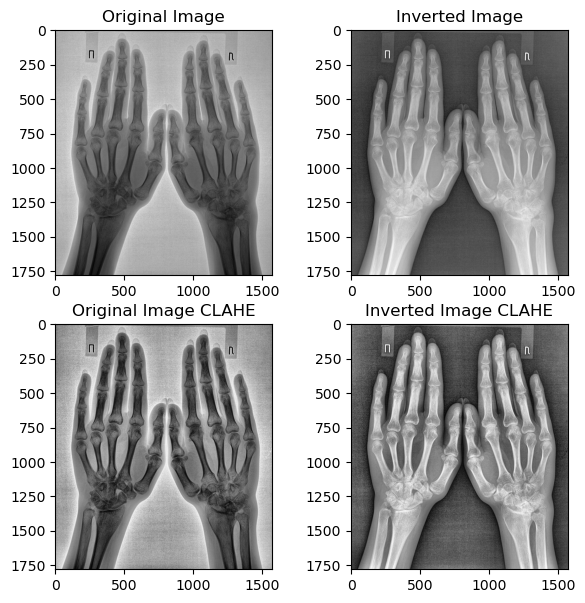

tensor(0.2470)
tensor(0.3071)


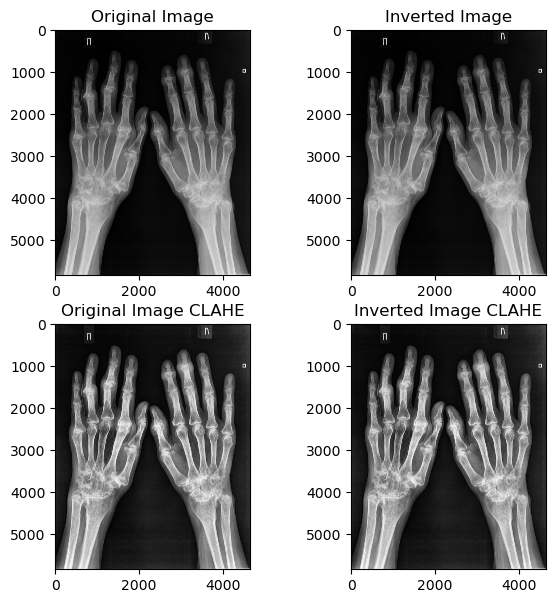

tensor(0.5476)
tensor(0.5453)


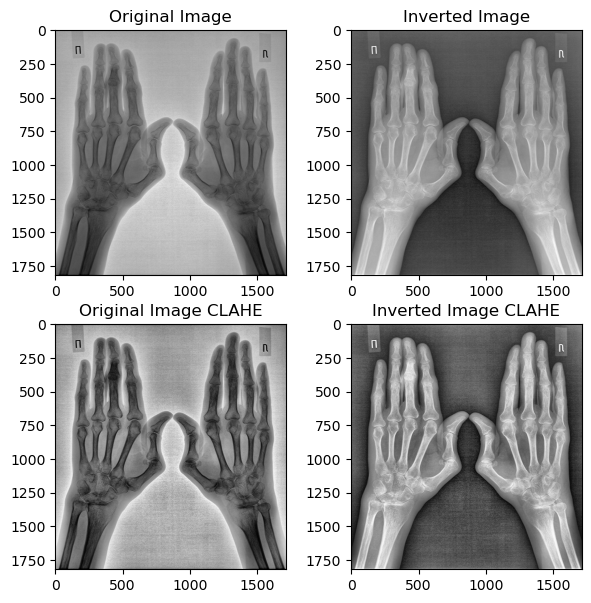

tensor(0.5094)
tensor(0.5090)


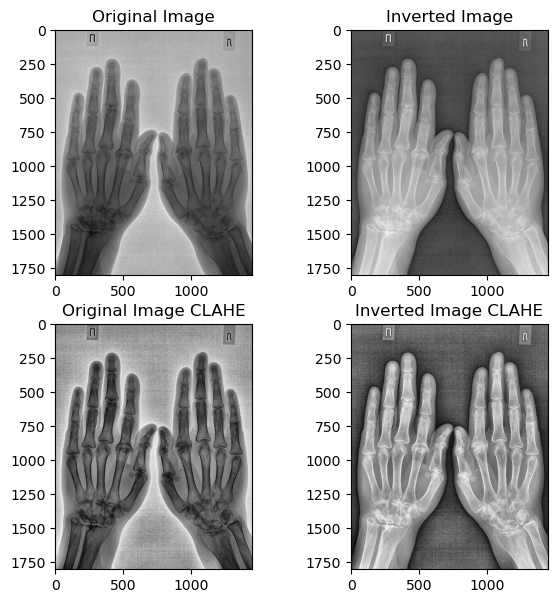

tensor(0.5384)
tensor(0.5402)


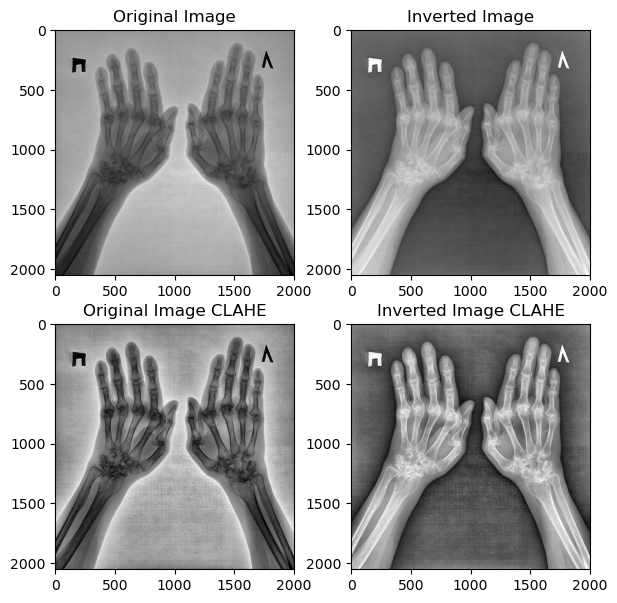

tensor(0.5349)
tensor(0.5366)


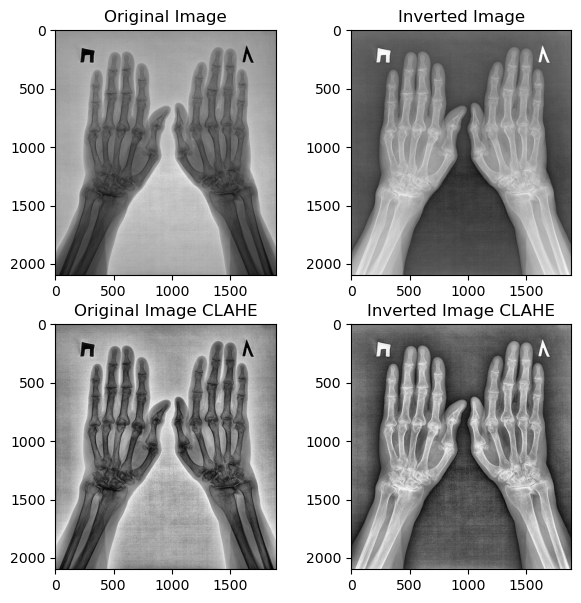

tensor(0.2578)
tensor(0.3131)


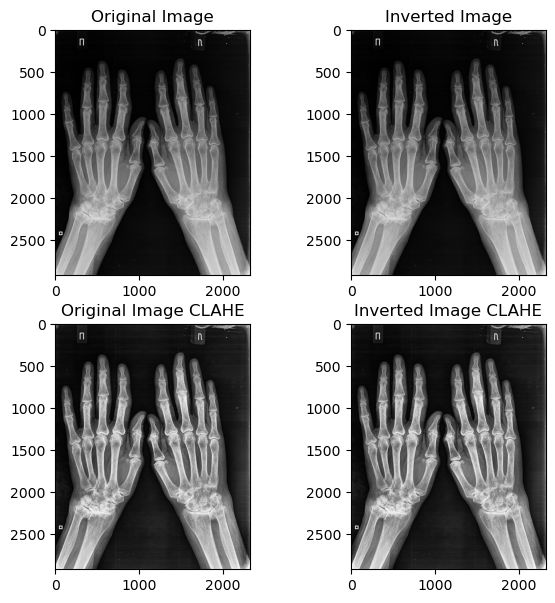

tensor(0.5530)
tensor(0.5382)


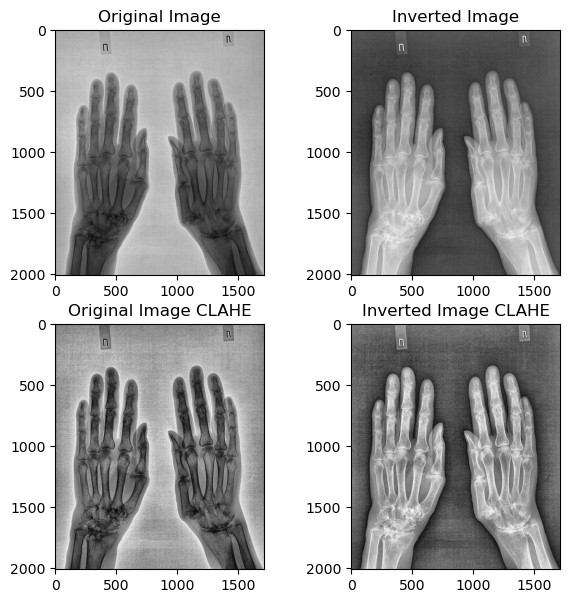

tensor(0.3227)
tensor(0.3589)


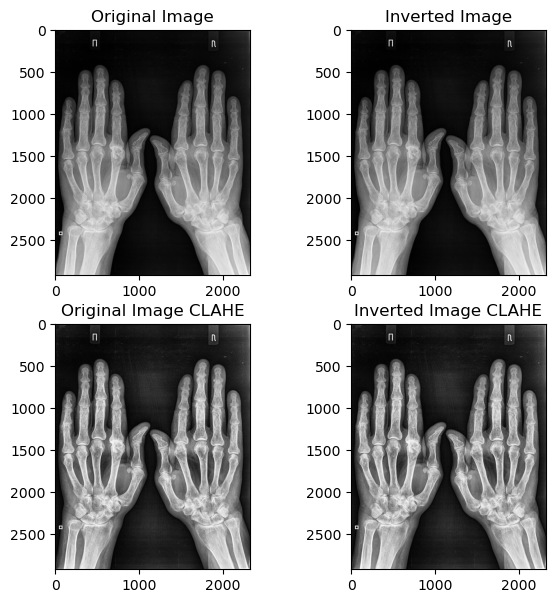

tensor(0.5465)
tensor(0.5283)


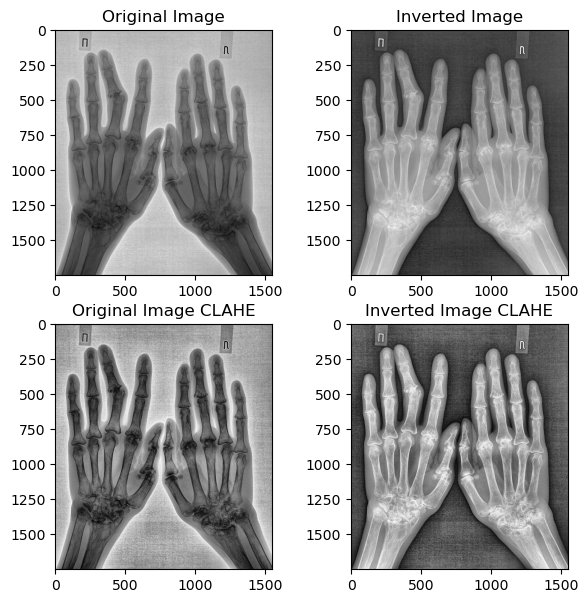

tensor(0.5574)
tensor(0.5431)


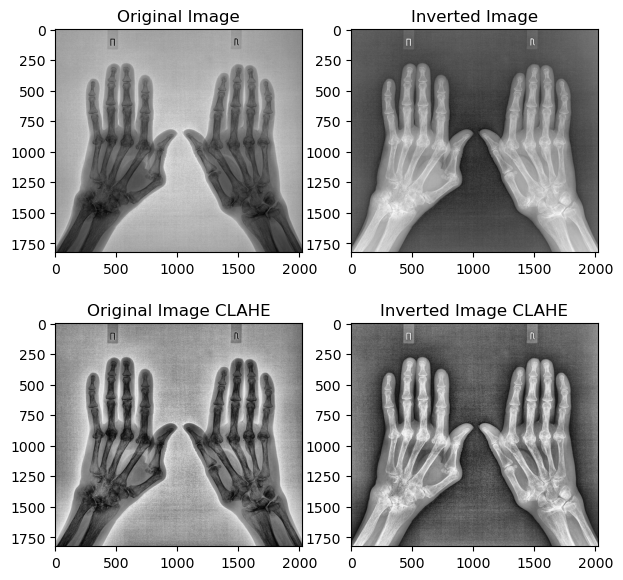

tensor(0.1858)
tensor(0.2241)


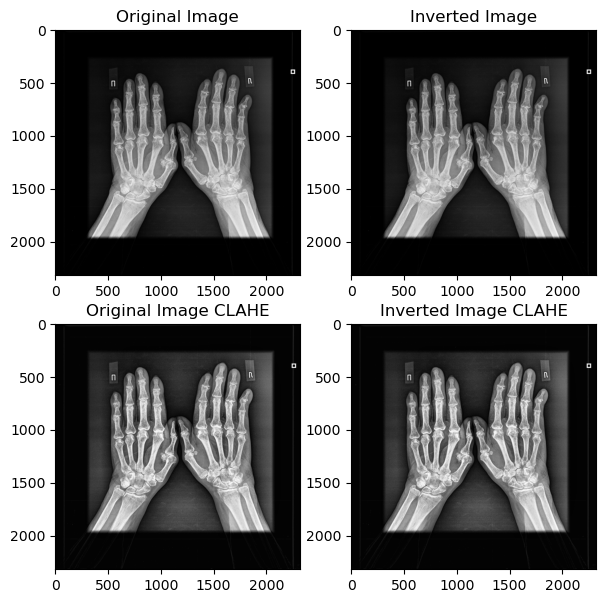

tensor(0.3222)
tensor(0.3535)


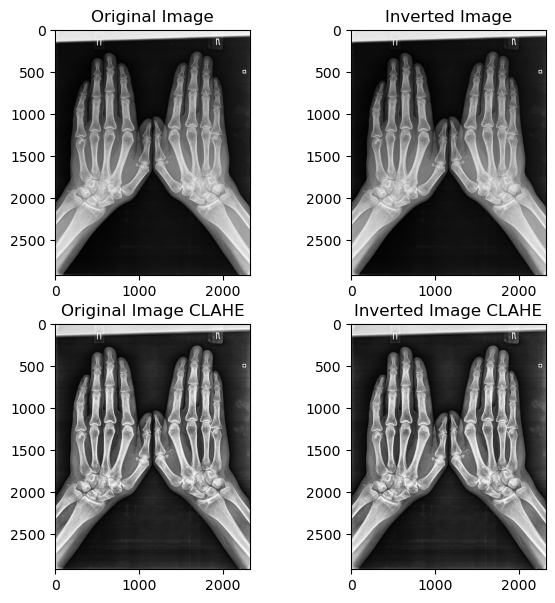

tensor(0.3410)
tensor(0.3691)


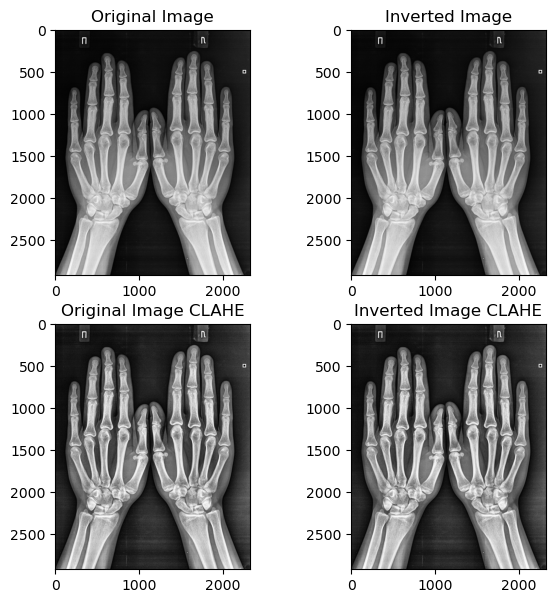

tensor(0.2651)
tensor(0.2955)


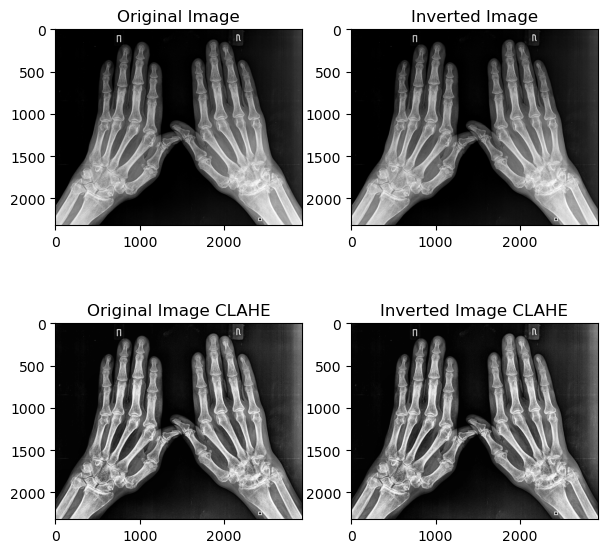

tensor(0.2532)
tensor(0.2923)
tensor(0.3370)
tensor(0.3526)
tensor(0.2701)
tensor(0.3129)
tensor(0.2986)
tensor(0.3370)
tensor(0.2712)
tensor(0.3120)
tensor(0.2895)
tensor(0.3202)
tensor(0.3085)
tensor(0.3250)
tensor(0.3418)
tensor(0.3615)
tensor(0.3200)
tensor(0.3579)
tensor(0.3001)
tensor(0.3337)
tensor(0.3763)
tensor(0.3883)
tensor(0.2885)
tensor(0.3296)
tensor(0.3022)
tensor(0.3361)
tensor(0.3142)
tensor(0.3481)
tensor(0.3162)
tensor(0.3587)
tensor(0.2852)
tensor(0.3157)
tensor(0.3193)
tensor(0.3481)
tensor(0.3178)
tensor(0.3493)
tensor(0.2980)
tensor(0.3397)
tensor(0.3009)
tensor(0.3409)
tensor(0.3283)
tensor(0.3413)
tensor(0.3285)
tensor(0.3653)
tensor(0.4228)
tensor(0.4397)
tensor(0.3578)
tensor(0.3763)
tensor(0.3284)
tensor(0.3536)
tensor(0.3035)
tensor(0.3360)
tensor(0.4152)
tensor(0.4308)
tensor(0.3453)
tensor(0.3744)
tensor(0.5998)
tensor(0.5694)
tensor(0.1786)
tensor(0.2261)
tensor(0.3688)
tensor(0.3982)
tensor(0.5316)
tensor(0.5310)
tensor(0.5651)
tensor(0.5559)
tensor(0.5

In [ ]:
os.makedirs(os.path.join('dataset', 'jpeg_inv_clahe'), exist_ok=True)
for i, file_name in enumerate(os.listdir(os.path.join('dataset', 'jpeg'))):
    img_tensor, img_tensor_cl = preprocess_image(os.path.join('dataset', 'jpeg', file_name))
    img_tensor_inv = get_inv(img_tensor)
    img_tensor_inv_cl = get_inv(img_tensor_cl)

    if i < 15:
        show_images(img_tensor, img_tensor_inv, img_tensor_cl, img_tensor_inv_cl)

    img = v2.functional.to_pil_image(img_tensor_inv_cl)
    img.save(os.path.join('dataset', 'jpeg_inv_clahe', file_name))

In [6]:
! pip install segment-geospatial
! pip install groundingdino-py 
! pip install leafmap 
! pip install localtileserver
! pip install protobuf==3.20.3
! pip install wrapt

Defaulting to user installation because normal site-packages is not writeable
  Using cached segment_geospatial-0.12.4-py2.py3-none-any.whl.metadata (11 kB)
  Using cached fiona-1.10.1-cp313-cp313-win_amd64.whl.metadata (58 kB)
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached huggingface_hub-0.29.3-py3-none-any.whl.metadata (13 kB)
  Using cached ipympl-0.9.7-py3-none-any.whl.metadata (8.7 kB)
  Using cached localtileserver-0.10.6-py3-none-any.whl.metadata (5.2 kB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached patool-4.0.0-py2.py3-none-any.whl.metadata (4.5 kB)
  Using cached pycocotools-2.0.8.tar.gz (24 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject

  error: subprocess-exited-with-error
  
  × Building wheel for pycocotools (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-313\pycocotools
      copying pycocotools\coco.py -> build\lib.win-amd64-cpython-313\pycocotools
      copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-313\pycocotools
      copying pycocotools\mask.py -> build\lib.win-amd64-cpython-313\pycocotools
      copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-313\pycocotools
      running build_ext
      Compiling pycocotools/_mask.pyx because it changed.
      [1/1] Cythonizing pycocotools/_mask.pyx
      C:\Users\Admin\AppData\Local\Temp\pip-build-env-tg9uy9uh\overlay\Lib\site-packages\Cython\Compiler\Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File:

Defaulting to user installation because normal site-packages is not writeable
  Using cached groundingdino_py-0.4.0-py2.py3-none-any.whl
  Using cached transformers-4.49.0-py3-none-any.whl.metadata (44 kB)
  Using cached addict-2.4.0-py3-none-any.whl.metadata (1.0 kB)
  Using cached yapf-0.43.0-py3-none-any.whl.metadata (46 kB)
  Using cached timm-1.0.15-py3-none-any.whl.metadata (52 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached supervision-0.6.0-py3-none-any.whl.metadata (6.2 kB)
  Using cached pycocotools-2.0.8.tar.gz (24 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached PyYAML-6.0.2-cp313-cp313-win_amd64.whl.metadata (2.1 kB)
  Using cac

  error: subprocess-exited-with-error
  
  × Building wheel for pycocotools (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-313\pycocotools
      copying pycocotools\coco.py -> build\lib.win-amd64-cpython-313\pycocotools
      copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-313\pycocotools
      copying pycocotools\mask.py -> build\lib.win-amd64-cpython-313\pycocotools
      copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-313\pycocotools
      running build_ext
      Compiling pycocotools/_mask.pyx because it changed.
      [1/1] Cythonizing pycocotools/_mask.pyx
      C:\Users\Admin\AppData\Local\Temp\pip-build-env-7e3jh_gj\overlay\Lib\site-packages\Cython\Compiler\Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File:

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached localtileserver-0.10.6-py3-none-any.whl.metadata (5.2 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached Flask_Caching-2.3.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached flask_cors-5.0.1-py3-none-any.whl.metadata (961 bytes)
  Using cached flask_restx-1.3.0-py2.py3-none-any.whl.metadata (9.3 kB)
  Using cached rio_tiler-7.5.0-py3-none-any.whl.metadata (12 kB)
  Using cached rio_cogeo-5.4.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached server_thread-0.3.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached aniso8601-10.0.0-py2.py3-none-any.whl.metadata (23 kB)
  Using cached importlib_res

  error: subprocess-exited-with-error
  
  × Building wheel for color-operations (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-313\color_operations
      copying color_operations\operations.py -> build\lib.win-amd64-cpython-313\color_operations
      copying color_operations\utils.py -> build\lib.win-amd64-cpython-313\color_operations
      copying color_operations\__init__.py -> build\lib.win-amd64-cpython-313\color_operations
      running egg_info
      writing color_operations.egg-info\PKG-INFO
      writing dependency_links to color_operations.egg-info\dependency_links.txt
      writing requirements to color_operations.egg-info\requires.txt
      writing top-level names to color_operations.egg-info\top_level.txt
      reading manifest file 'color_operations.egg-info\SOURCES.txt'
      adding license file 'LICENSE'
      writing ma

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
from PIL import Image
from samgeo.text_sam import LangSAM

model = LangSAM()

text_prompt = 'x-ray hand'

for i, file_name in enumerate(os.listdir(os.path.join('dataset', 'jpeg'))[:5]):
    # Загружаем изображение
    image_pil = Image.open(os.path.join('dataset', 'jpeg_inv_clahe', file_name)).convert("RGB")

    # Передаем само изображение, а не путь к нему
    model.predict(image_pil, text_prompt, box_threshold=0.25, text_threshold=0.3) # Трешхолды можно покрутить

    model.show_anns(
        cmap='Reds',
        box_color='red',
        title=f'Автоматическая сегментация {text_prompt}',
        alpha=0.5,
        blend=True,
        output='result.jpg')

ModuleNotFoundError: No module named 'samgeo'